# Import All Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.metrics  as met
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV as grid
import warnings

In [2]:
warnings.filterwarnings('always')

Read dataset from csv using pandas library

In [3]:
data = pd.read_csv('/content/car_data.csv')
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


#Exploratory Data Analysis

Print rows and columns in dataset to know how much data and features we have

In [4]:
print("There are {} rows in dataset".format(data.shape[0]))
print("There are {} columns in dataset".format(data.shape[1]))

There are 1000 rows in dataset
There are 5 columns in dataset


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [6]:
data.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


Check if there is missing value in dataset

In [7]:
data.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

We see that there is no missing value in the dataset. 


Therefore we can skip to the next steps 

#One Hot Encoding

we see that gender is a categorical data, therefore we need to change it into numerical.

In [8]:
encoding = {'Gender': {'Male':0, 'Female':1}}
data.replace(encoding, inplace=True)

In [9]:
data.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,0,35,20000,0
1,681,0,40,43500,0
2,353,0,49,74000,0
3,895,0,40,107500,1
4,661,0,25,79000,0


#Find the correlation between all features

Text(0.5, 1.0, 'Correlation Matrix for All Features ')

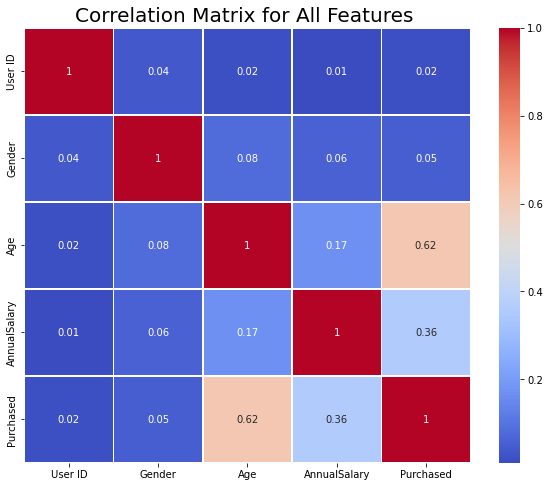

In [10]:
plt.figure(figsize=(10,8))
correlation_matrix = data.corr().round(2)

#Print scores using heatmap 
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix for All Features ", size=20)

Because features 'User ID' and 'Gender' have the lowest correlation, then we need to remove it

In [11]:
data.drop(['User ID'], axis=1, inplace=True)
data.drop(['Gender'], axis=1, inplace=True)
data.head()

,Age,AnnualSalary,Purchased
0,35,20000,0
1,40,43500,0
2,49,74000,0
3,40,107500,1
4,25,79000,0


#Univariate Analysis

We analyze 'Purchased' column because we want to know how much 1 (purchased) and 0 (not purchased) in dataset

In [12]:
data['Purchased'].value_counts()

0    598
1    402
Name: Purchased, dtype: int64

Analyze maximum age and minimum age in dataset, and maximum anual salary and minimum anual salary in dataset

In [13]:
age = data['Age']
annual_salary = data['AnnualSalary']
print('maximum age in dataset is {} and minimum age in dataset is {}' .format(age.max(), age.min()))
print('maximum annual salary in dataset is {} and minimum annual salary in dataset is {}' .format(annual_salary.max(), annual_salary.min()))

maximum age in dataset is 63 and minimum age in dataset is 18
maximum annual salary in dataset is 152500 and minimum annual salary in dataset is 15000


# Multivariate Analysis

In this step, we will analyze all **features**.

We remove 'Purchased' because that is target column and not features

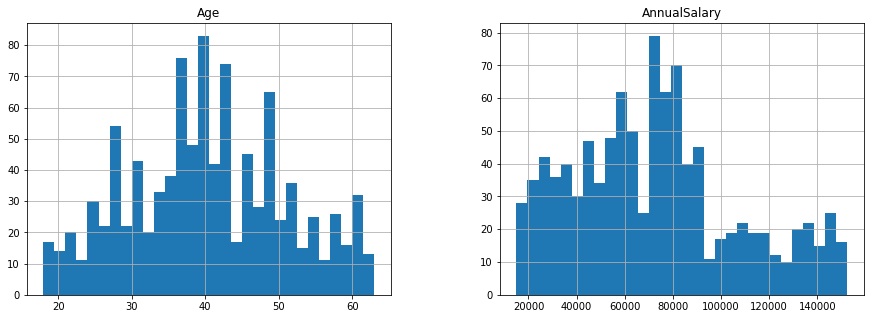

In [14]:
features = data.drop(['Purchased'], axis=1)
features.head()
features.hist(bins=30, figsize=(15,5))
plt.show()

# Handle Outliers

To find the outliers, first we need to plot all the features to find the outliers, we using boxplot to visualize them

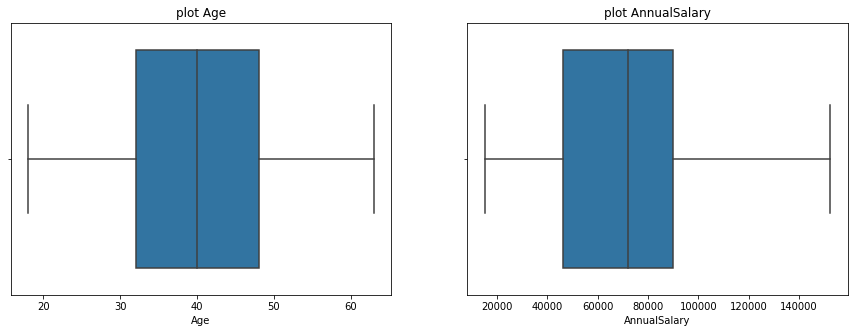

In [15]:
fig = plt.figure(figsize= (15,5))
columns = ['Age', 'AnnualSalary']
for index in range(1,3):
  ax = fig.add_subplot(1,2, index)
  ax.set_title("plot {}".format(columns[index-1]))
  sns.boxplot(x=data[columns[index-1]], ax=ax)

plt.show()

Because we do not have any outliers, therefore we can move to next steps

#Data Preparation

In this data preparation, we split train and test data

In [32]:
x = data[['Age', 'AnnualSalary']].values
y = data['Purchased'].values

Standarization to make value in features become 0 to 1

In [33]:
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=10, test_size= 0.2)

In [35]:
print("x_train: {}".format(x_train.shape))
print("y_train: {}".format(y_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_test: {}".format(y_test.shape))

x_train: (800, 2)
y_train: (800,)
x_test: (200, 2)
y_test: (200,)


# Random Fores Classifier

We use Random Fores Classifier algorithm to classify which customer will purchase the car 

In [38]:
model = RandomForestClassifier()
parameters = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
}

#melatih model dengan fungsi fit
grid_search = grid(model, parameters)
grid_search.fit(x_train,y_train)
#menampilkan parameter terbaik dari objek grid_search
print(grid_search.best_params_)

{'criterion': 'gini', 'n_estimators': 400}


In [40]:
model= RandomForestClassifier(n_estimators = 400, criterion= 'gini')
model.fit(x_train, y_train)
# predictions = model.predict(X_test)
# accuracy_score(y_test, predictions)

RandomForestClassifier(n_estimators=400)

In [41]:
predict = model.predict(x_test)
print("Logistic Regression Mean Squared Error: {}".format(mean_squared_error(y_pred = predict, y_true=y_test)))
print("Logistic Regression Accuracy: {}".format(accuracy_score(y_test, predict)))
print("Confussion Matrix: \n{}".format(met.confusion_matrix(y_test, predict)))
print("Classification Report: \n{}".format(classification_report(y_test, predict)))

Logistic Regression Mean Squared Error: 0.125
Logistic Regression Accuracy: 0.875
Confussion Matrix: 
[[114  12]
 [ 13  61]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       126
           1       0.84      0.82      0.83        74

    accuracy                           0.88       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.87      0.88      0.87       200

